# tapakah68 Facial-Emotion-Recognition Dataset

## Features Processing

In [4]:
# Declare Paths
import os
import sys
TRAINING_PATH = os.path.join(
    os.path.dirname(os.path.realpath(os.curdir)),
    'facial-emotion-recognition',
    'versions',
    '2',
    'images'
)
TESTING_PATH = os.path.join(
    os.path.dirname(os.path.realpath(os.curdir)),
    'facial-emotion-recognition',
    'versions',
    '2',
    'images'
)
AI_MODEL_PATH = os.path.join(
    os.path.dirname(os.path.realpath(os.curdir)),
    '..',
    '..'
)
sys.path.append(AI_MODEL_PATH)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
from image_preprocessing import preprocess, encode_labels, decode_labels, visualize_image

## Load the Images Data

In [6]:
X_train = []
y_train = []
X_test = []
y_test = []

# Training data
for subdir in os.listdir(TRAINING_PATH):
    subdir_path = os.path.join(TRAINING_PATH, subdir)
    if os.path.isdir(subdir_path):
        for imageName in os.listdir(subdir_path):
            image_path = os.path.join(subdir_path, imageName)
            image = plt.imread(image_path)
            X_train.append(image)
            label = imageName.split(".")[0]
            y_train.append(label)

# Testing data
for subdir in os.listdir(TESTING_PATH):
    subdir_path = os.path.join(TESTING_PATH, subdir)
    if os.path.isdir(subdir_path):
        for imageName in os.listdir(subdir_path):
            image_path = os.path.join(subdir_path, imageName)
            image = plt.imread(image_path)
            X_test.append(image)
            label = imageName.split(".")[0]
            y_test.append(label)

Before Processing...
Training Set


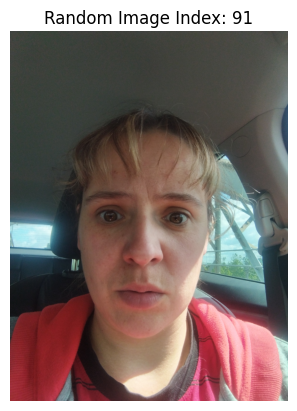

Testing Set


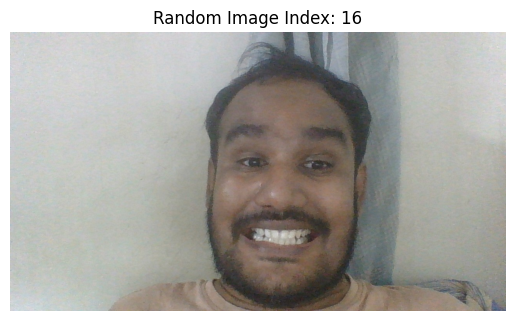

In [7]:
# Visualizing
# Since Each Raw Image has ambiguous resolutions, we need to resize them manually.
print("Before Processing...")
# Train
random_index_X_train = random.randint(0, len(X_train)-1)
random_image_train = X_train[random_index_X_train]

print("Training Set")
plt.imshow(random_image_train)
plt.title(f'Random Image Index: {random_index_X_train}')
plt.axis('off')
plt.show()

# Test
random_index_X_test = random.randint(0, len(X_test)-1)
random_image_test = X_test[random_index_X_test]

print("Testing Set")
plt.imshow(random_image_test)
plt.title(f'Random Image Index: {random_index_X_test}')
plt.axis('off')
plt.show()

In [8]:
# Number of possible labels (emotions)
labels = list(set(y_train + y_test))
print(f"Number of possible labels (emotions): {len(labels)}")
print(f"Labels: {labels}")

Number of possible labels (emotions): 8
Labels: ['Contempt', 'Sad', 'Anger', 'Fear', 'Disgust', 'Happy', 'Surprised', 'Neutral']


In [9]:
# Replace "Contempt" with "Stressed"
y_train = [label if label != "Contempt" else "Stressed" for label in y_train]
y_test = [label if label != "Contempt" else "Stressed" for label in y_test]

In [10]:
# Check again: Number of possible labels (emotions)
labels = list(set(y_train + y_test))
print(f"Number of possible labels (emotions): {len(labels)}")
print(f"Labels: {labels}")

Number of possible labels (emotions): 8
Labels: ['Stressed', 'Sad', 'Anger', 'Fear', 'Disgust', 'Happy', 'Surprised', 'Neutral']


In [11]:
print(f"Number of Training Images: {len(X_train)}")
print(f"Number of Training Labels: {len(y_train)}")

Number of Training Images: 152
Number of Training Labels: 152


## Preprocess the Images

In [12]:
X_train_processed = []
X_test_processed = []
# Training data
for image in X_train:
    processed_image = preprocess(image)
    X_train_processed.append(processed_image)
# Testing data
for image in X_test:
    processed_image = preprocess(image)
    X_test_processed.append(processed_image)

In [13]:
print(f"Shape of Processed X_train: {X_train_processed[0].shape}")
print(f"Shape of Processed X_test: {X_test_processed[0].shape}")

Shape of Processed X_train: (64, 64)
Shape of Processed X_test: (64, 64)


In [15]:
X_train_processed = np.array(X_train_processed)
X_test_processed = np.array(X_test_processed)

After Processing...


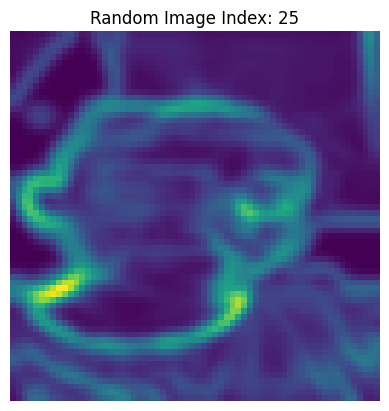

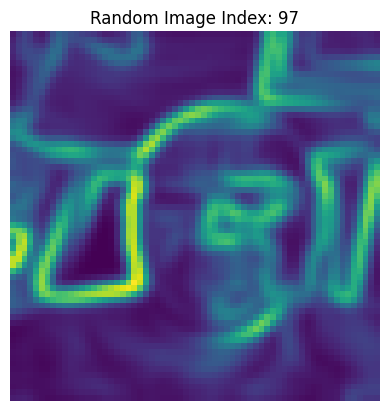

In [16]:
# Visualizing
print("After Processing...")
# Train
visualize_image(X_train_processed)
# Test
visualize_image(X_test_processed)

In [21]:
# Encode the Labels
y_train_encoded, encoder_train = encode_labels(y_train)
y_test_encoded, encoder_test = encode_labels(y_test)
# Check the Encoded Labels
print(f"Unique Encoded Labels in training set: {list(set(y_train_encoded))}")
print(f"Unique Encoded Labels in testing set: {list(set(y_test_encoded))}")


assert all(y_train == decode_labels(y_train_encoded, encoder_train))
assert all(y_test == decode_labels(y_test_encoded, encoder_test))

assert len(X_train_processed) == len(y_train_encoded)
assert len(X_test_processed) == len(y_test_encoded)

Unique Encoded Labels in training set: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Unique Encoded Labels in testing set: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]


In [ ]:
# Save the processed data
if (not os.path.exists('labels')):
    os.makedirs('labels')
if (not os.path.exists('features')):
    os.makedirs('features')
if (not os.path.exists('encoders')):
    os.makedirs('encoders')

np.save('features/X_train.npy', X_train_processed)
np.save('features/X_test.npy', X_test_processed)
np.save('labels/y_train.npy', y_train_encoded)
np.save('labels/y_test.npy', y_test_encoded)
np.save('encoders/encoder_train.npy', encoder_train)
np.save('encoders/encoder_test.npy', encoder_test)
print("Data Saved Successfully!")

Data Saved Successfully!
